In [1]:
pacman::p_load(tidyverse, tm, stringr,NLP, RColorBrewer, wordcloud, Matrix, recommenderlab, slam, data.table, rARPACK)

In [2]:
setwd('C:/Users/nchandra/OneDrive - National University of Singapore/CARecSys')

In [3]:
wine <- read.csv('./Data/wine-reviews/winemag-data-130k-v2.csv', na.strings = c("","NA"), stringsAsFactors = FALSE)

|colname|definition|
|:---|:---|
|country|The country that the wine is from
|description|---|
|designation|The vineyard within the winery where the grapes that made the wine are from|
|points|The number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)|
|price|The cost for a bottle of the wine|
|province|The province or state that the wine is from|
|region_1|The wine growing area in a province or state (ie Napa)|
|region_2|Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank|
|taster_name|---|
|taster_twitter_handle|---|
|title|The title of the wine review, which often contains the vintage if you're interested in extracting that feature|
|variety|The type of grapes used to make the wine (ie Pinot Noir)|
|winery|The winery that made the wine|

In [4]:
head(wine,2)

X,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",VulkÃ Bianco,87,NA,Sicily & Sardinia,Etna,NA,Kerin Oâ€™Keefe,@kerinokeefe,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87,15,Douro,NA,NA,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [5]:
str(wine)

'data.frame':	129971 obs. of  14 variables:
 $ X                    : int  0 1 2 3 4 5 6 7 8 9 ...
 $ country              : chr  "Italy" "Portugal" "US" "US" ...
 $ description          : chr  "Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering un"| __truncated__ "This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy r"| __truncated__ "Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp ac"| __truncated__ "Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with note"| __truncated__ ...
 $ designation          : chr  "VulkÃ  Bianco" "Avidagos" NA "Reserve Late Harvest" ...
 $ points               : int  87 87 87 87 87 87 87 87 87 87 ...
 $ price                : num  NA 15 14 13 65 15 16 24 12 27 ...
 $ province             : chr  "Sicily & Sardinia" "Douro" "Oregon" 

In [6]:
summary(wine)

       X            country          description        designation       
 Min.   :     0   Length:129971      Length:129971      Length:129971     
 1st Qu.: 32493   Class :character   Class :character   Class :character  
 Median : 64985   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 64985                                                           
 3rd Qu.: 97478                                                           
 Max.   :129970                                                           
                                                                          
     points           price           province           region_1        
 Min.   : 80.00   Min.   :   4.00   Length:129971      Length:129971     
 1st Qu.: 86.00   1st Qu.:  17.00   Class :character   Class :character  
 Median : 88.00   Median :  25.00   Mode  :character   Mode  :character  
 Mean   : 88.45   Mean   :  35.36                                        
 3rd Qu.: 91.00   3rd Qu.:  42

In [7]:
# remove X to identify duplicates
wine <- select(wine, -c('X'))

In [8]:
dim(wine)

[1] 129971     13

In [9]:
# Remove duplicate records
wine_nodup <- distinct(wine)

In [10]:
dim(wine_nodup)

[1] 119988     13

Next step, check for missing values

In [11]:
wine_nodup[!complete.cases(wine_nodup),]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",VulkÃ Bianco,87,NA,Sicily & Sardinia,Etna,NA,Kerin Oâ€™Keefe,@kerinokeefe,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Nicosia
2,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87,15,Douro,NA,NA,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
3,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",NA,87,14,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
4,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,NA,Alexander Peartree,NA,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian
6,Spain,"Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",Ars In Vitro,87,15,Northern Spain,Navarra,NA,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra),Tempranillo-Merlot,Tandem
7,Italy,"Here's a bright, informal red that opens with aromas of candied berry, white pepper and savory herb that carry over to the palate. It's balanced with fresh acidity and soft tannins.",Belsito,87,16,Sicily & Sardinia,Vittoria,NA,Kerin Oâ€™Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
8,France,"This dry and restrained wine offers spice in profusion. Balanced with acidity and a firm texture, it's very much for food.",NA,87,24,Alsace,Alsace,NA,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),GewÃ¼rztraminer,Trimbach
9,Germany,"Savory dried thyme notes accent sunnier flavors of preserved peach in this brisk, off-dry wine. It's fruity and fresh, with an elegant, sprightly footprint.",Shine,87,12,Rheinhessen,NA,NA,Anna Lee C. Iijima,NA,Heinz Eifel 2013 Shine GewÃ¼rztraminer (Rheinhessen),GewÃ¼rztraminer,Heinz Eifel
10,France,This has great depth of flavor with its fresh apple and pear fruits and touch of spice. It's off dry while balanced with acidity and a crisp texture. Drink now.,Les Natures,87,27,Alsace,Alsace,NA,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris (Alsace),Pinot Gris,Jean-Baptiste Adam


In [12]:
#percentage of rows with missing value
nrow(wine_nodup[!complete.cases(wine_nodup),])/nrow(wine_nodup)

[1] 0.8292079

In [13]:
# if we narrow down to check only completeness of "description, designation, taser_name, points, price, variety, country, province"
nrow(wine_nodup[complete.cases(wine_nodup[c('description','designation', 'taster_name', 'points', 'price','variety', 'country', 'province')]),])/nrow(wine_nodup)

[1] 0.5338034

In [14]:
# new dataframe after removing rows with NAs from description, designation, taster_name, points, price, variety, country, province
wine_clean <- wine_nodup[complete.cases(wine_nodup[c('description','designation', 'taster_name', 'points', 'price','variety', 'country', 'province')]),]

In [15]:
# Make GSM a set of character so that it does not get split in text analysis
wine_clean[wine_clean$variety == 'G-S-M', 'variety'] = 'GSM'

In [16]:
#wine_clean$year = gsub

In [17]:
# further subset the data to only wine from France to prevent oversized matrix
wine_clean <- wine_clean%>%
    filter(country == 'France')

In [18]:
# check number of duplicated records in wine_clean
sum(duplicated(wine_clean))

[1] 0

In [19]:
#percentage of data left after the preprocessing
nrow(wine_clean)/nrow(wine)

[1] 0.08195674

In [20]:
dim(wine_clean)

[1] 10652    13

In [21]:
# in the original dataset some taster_name does not have twitter handle thus taster_name will be used as user identifier
sum(is.na(wine_clean$taster_name))

[1] 0

In [22]:
#check missing product title after clean up
sum(is.null(wine_clean$title))

[1] 0

In [23]:
#check missing rating
sum(is.na(wine_clean$points))

[1] 0

In [24]:
# check missing price
sum(is.na(wine_clean$price))

[1] 0

In [25]:
# check for missing designation
sum(!complete.cases(wine_clean$designation))

[1] 0

In [26]:
#convert data type
wine_clean <- wine_clean %>%
    #convert taster_twitter_handle and taster_name to factor
    mutate(taster_twitter_handle = as.factor(taster_twitter_handle)) %>%
    mutate(taster_name = as.factor(taster_name)) %>%
    #convert variety and winery to factor
    mutate(variety = as.factor(variety)) %>%
    mutate(winery = as.factor(winery)) %>%
    #convert country as factor
    mutate(country = as.factor(country))

In [27]:
head(wine_clean)

country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
<fct>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>
France,This has great depth of flavor with its fresh apple and pear fruits and touch of spice. It's off dry while balanced with acidity and a crisp texture. Drink now.,Les Natures,87,27,Alsace,Alsace,NA,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris (Alsace),Pinot Gris,Jean-Baptiste Adam
France,"This is a festive wine, with soft, ripe fruit and acidity, plus a red berry flavor.",Nouveau,86,9,Beaujolais,Beaujolais,NA,Roger Voss,@vossroger,Henry Fessy 2012 Nouveau (Beaujolais),Gamay,Henry Fessy
France,"Soft and fruity, this is a generous, ripe wine that's full of juicy red-cherry fruits and gentle tannins. It has some richness, giving a sweet character to this open, ready-to-drink wine.",EtÃ© Indien,86,14,Beaujolais,Brouilly,NA,Roger Voss,@vossroger,Vignerons de Bel Air 2011 EtÃ© Indien (Brouilly),Gamay,Vignerons de Bel Air
France,"Fruity and lightly herbaceous, this has fine textured acidity along with a pink grapefruit flavor. The wine is bright and easy, and it will be ready to drink in a few months.",La Fleur d'AmÃ©lie,85,15,Bordeaux,Bordeaux Blanc,NA,Roger Voss,@vossroger,ChÃ¢teau de Sours 2011 La Fleur d'AmÃ©lie (Bordeaux Blanc),Bordeaux-style White Blend,ChÃ¢teau de Sours
France,"This fat, yeasty Champagne is comprised predominantly of Pinot Noir. It has ripe red berry fruit, light acidity and a soft, creamy aftertaste. It's ready to drink.",Brut RosÃ©,86,58,Champagne,Champagne,NA,Roger Voss,@vossroger,Roland Champion NV Brut RosÃ© (Champagne),Champagne Blend,Roland Champion
France,"This cooperative, based in AÃ¿, has benefited from the fine Pinot Noir in the village to produce a ripe red fruited wine. With balanced acidity and a soft aftertaste, it is ready to drink.",Brut RosÃ©,86,55,Champagne,Champagne,NA,Roger Voss,@vossroger,Collet NV Brut RosÃ© (Champagne),Champagne Blend,Collet


'title' is product name, 'points' = the reviewer's rating, 'taster_name' as user identifier, 'variety' as wine group

In [28]:
# assign tasterID and wineID as unique identifier
wine_clean <- wine_clean %>%
    mutate(tasterID = group_indices(.,taster_name), wineID = group_indices(.,title))

**Count of reviews each taster**

In [29]:
wine_clean %>%
    group_by(taster_name) %>%
    summarize(count = n()) %>%
    arrange(-count)

taster_name,count
<fct>,<int>
Roger Voss,8453
Anne KrebiehlÂ MW,1051
Joe Czerwinski,720
Lauren Buzzeo,381
Paul Gregutt,31
Michael Schachner,16


**Review Count for each Variety**

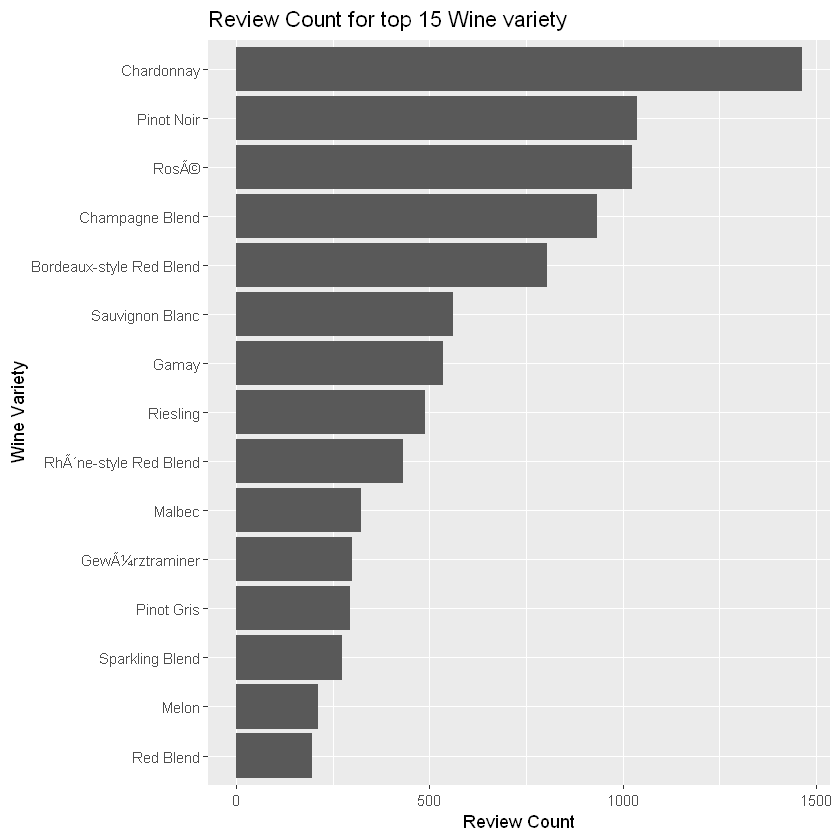

In [30]:
wine_clean %>%
    group_by(variety) %>%
    summarize(rev_count = n()) %>%
    arrange(-rev_count) %>%
    head(15) %>%
    ggplot(aes(x = reorder(as.factor(variety),rev_count), y = rev_count)) + geom_bar(stat = 'identity') + coord_flip() +
    labs(x = 'Wine Variety', 
         y = 'Review Count', 
         title = "Review Count for top 15 Wine variety")

In [31]:
# get mean point for each product
mean_score <- ungroup(wine_clean) %>%
    group_by(title) %>%
    summarize(mean_points = mean(points)) %>%
    arrange(desc(mean_points))

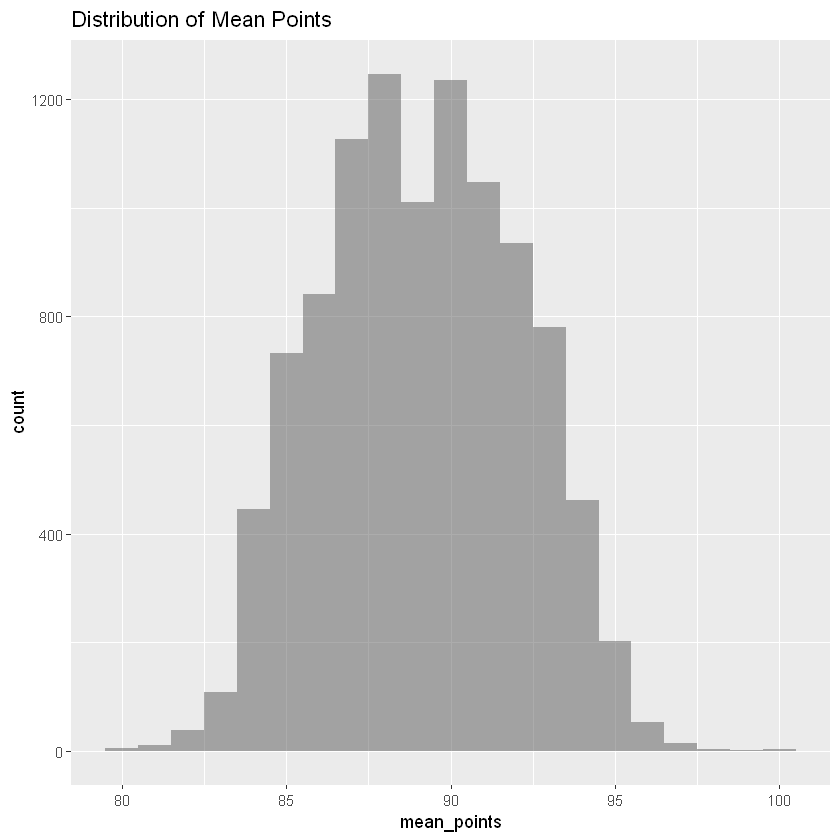

In [32]:
ggplot(mean_score, aes(mean_points)) + geom_histogram(binwidth = 1, alpha = 0.5, position = 'identity') +
labs(title = 'Distribution of Mean Points')

In [33]:
wine_clean %>%
    group_by(variety) %>%
    summarize(mean_points = mean(points), median_points = median(points), max_points = max(points))

variety,mean_points,median_points,max_points
<fct>,<dbl>,<dbl>,<int>
Abouriou,87.00000,87.0,87
AligotÃ©,86.30000,86.5,88
Alsace white blend,90.60976,92.0,96
Altesse,87.50000,87.5,88
Auxerrois,88.75000,89.0,90
Bordeaux-style Red Blend,87.72919,88.0,95
Bordeaux-style White Blend,87.61957,88.0,96
Braucol,91.00000,91.0,92
Cabernet,85.00000,85.0,85


In [34]:
# number of unique product
print(paste('Number of wine product:',length(unique(wine_clean$title))))

[1] "Number of wine product: 10309"


In [35]:
#number of unique designation
print(paste('Number of wine variety:',length(unique(wine_clean$variety))))

[1] "Number of wine variety: 122"


In [36]:
head(wine_clean, 3)

country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,tasterID,wineID
<fct>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>,<int>,<int>
France,This has great depth of flavor with its fresh apple and pear fruits and touch of spice. It's off dry while balanced with acidity and a crisp texture. Drink now.,Les Natures,87,27,Alsace,Alsace,NA,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris (Alsace),Pinot Gris,Jean-Baptiste Adam,6,6832
France,"This is a festive wine, with soft, ripe fruit and acidity, plus a red berry flavor.",Nouveau,86,9,Beaujolais,Beaujolais,NA,Roger Voss,@vossroger,Henry Fessy 2012 Nouveau (Beaujolais),Gamay,Henry Fessy,6,6680
France,"Soft and fruity, this is a generous, ripe wine that's full of juicy red-cherry fruits and gentle tannins. It has some richness, giving a sweet character to this open, ready-to-drink wine.",EtÃ© Indien,86,14,Beaujolais,Brouilly,NA,Roger Voss,@vossroger,Vignerons de Bel Air 2011 EtÃ© Indien (Brouilly),Gamay,Vignerons de Bel Air,6,9837


In [37]:
# check the wineID against unique number of title
max(wine_clean$wineID) == length(unique(wine_clean$title))

[1] TRUE

In [38]:
# check the userID against unique number of taster_name
max(wine_clean$tasterID) == length(unique(wine_clean$taster_name))

[1] TRUE

In [39]:
print(paste('Number of wine reviewer:', length(unique(wine_clean$taster_name)), ', for', length(unique(wine_clean$title)), 'wine products'))

[1] "Number of wine reviewer: 6 , for 10309 wine products"


In [40]:
#taster
taster <- wine_clean %>%
    group_by(tasterID, taster_name) %>%
    summarize(Rcount = n(), maxpoint = max(points), minpoint = min(points), average = mean(points))


In [41]:
# top 3 tasters by review count
head(taster[order(-taster$Rcount),],3)

tasterID,taster_name,Rcount,maxpoint,minpoint,average
<int>,<fct>,<int>,<int>,<int>,<dbl>
6,Roger Voss,8453,100,80,89.00355
1,Anne KrebiehlÂ MW,1051,97,80,90.84967
2,Joe Czerwinski,720,96,81,88.82361


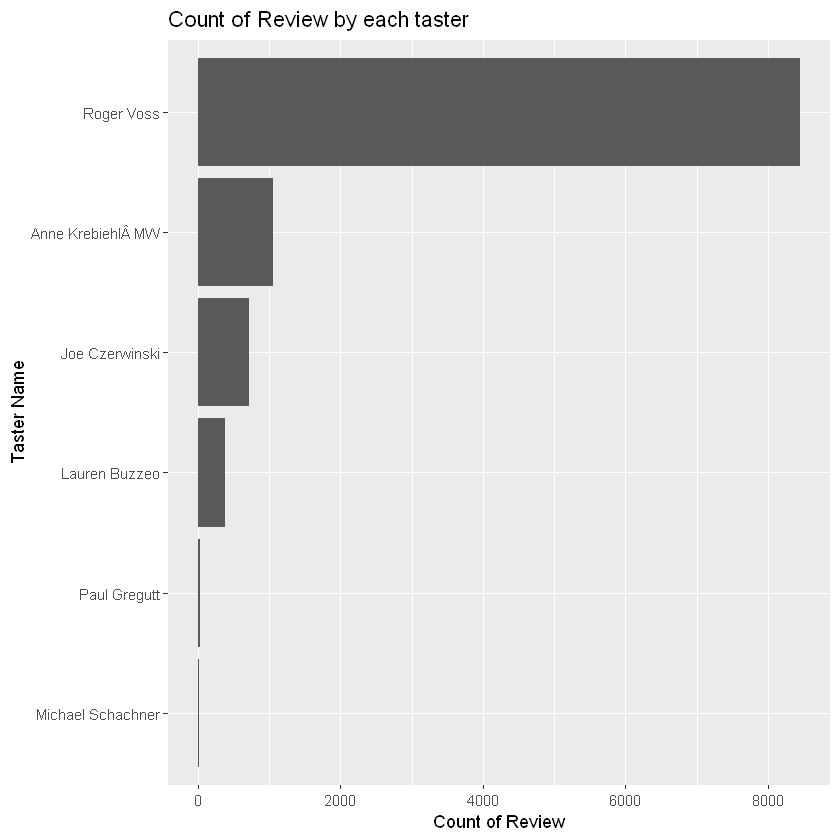

In [42]:
ggplot(taster, aes(x = reorder(as.factor(taster_name),Rcount), y = Rcount)) + 
geom_bar(stat = 'identity') +
labs(x = "Taster Name", y = 'Count of Review', title = 'Count of Review by each taster') + 
coord_flip()

Clearly Roger Voss dominates in terms of number of wine reviews

In [43]:
#wine
wineprod <- wine_clean %>%
    group_by(wineID, title) %>%
    summarize(Rcount = n(), maxpoint = max(points), minpoints = min(points), average = mean(points)) %>%
    arrange(desc(Rcount))


In [44]:
table(wineprod$Rcount)


    1     2     3     4     6 
10039   215    41    12     2 

In [45]:
#top 5 most reviewed wine
head(wineprod[order(-wineprod$Rcount, -wineprod$average),], 5)

wineID,title,Rcount,maxpoint,minpoints,average
<int>,<chr>,<int>,<int>,<int>,<dbl>
307,Bailly-Lapierre NV Brut (CrÃ©mant de Bourgogne),6,91,90,90.33333
9456,Ruinart NV Brut RosÃ© (Champagne),6,91,87,89.83333
8224,Louis Roederer NV Brut Premier (Champagne),4,92,91,91.75000
9455,Ruinart NV Blanc de Blancs Brut Chardonnay (Champagne),4,93,90,91.75000
9711,ThiÃ©not NV Brut (Champagne),4,91,89,90.00000


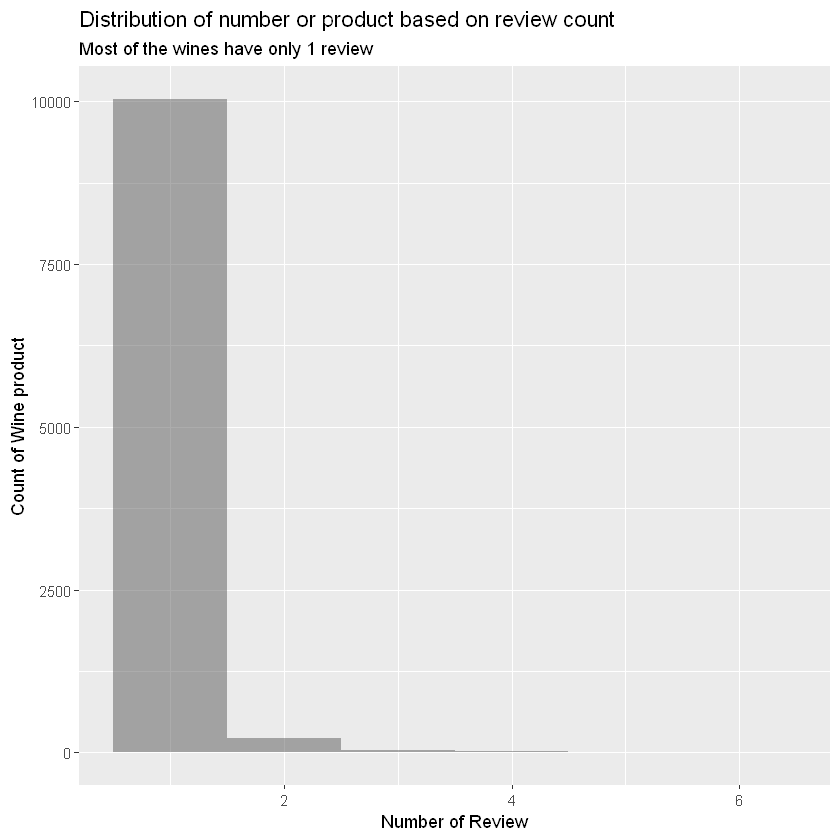

In [46]:
ggplot(wineprod, aes(Rcount)) + geom_histogram(binwidth = 1, alpha = 0.5, position = 'identity') +
labs( x = "Number of Review",
     y = "Count of Wine product", 
     title = 'Distribution of number or product based on review count',
    subtitle = 'Most of the wines have only 1 review')

In [47]:
# Do tasters who review more wine tend to give different scores?
wine4 <- merge(wine_clean, taster[c('tasterID', 'Rcount')], by.x = 'tasterID', by.y = 'tasterID', all.x = T)
wine4 <- merge(wine4, wineprod[c('wineID', 'average')], by.x = 'wineID', by.y = 'wineID', all.x = T)

avgpoint <- round(mean(wine4$points),2)

In [48]:
avgpoint

[1] 89.11

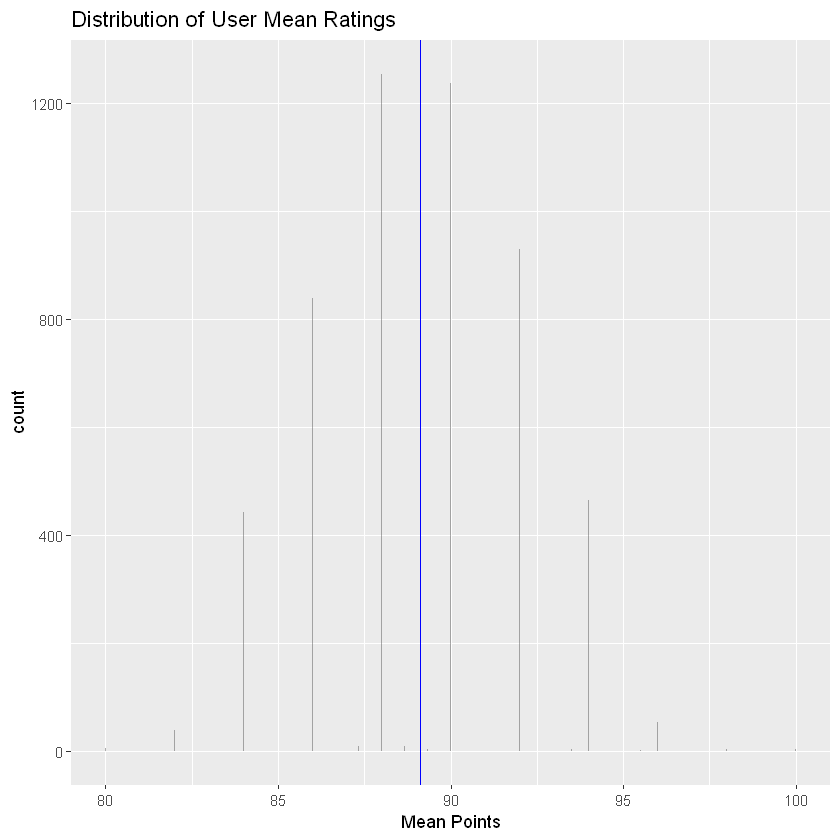

In [49]:
#distribution of wine mean point
ggplot(wine4, aes(x = average)) +
    geom_histogram(binwidth = 0.01, alpha = .5, position = 'identity') +
    geom_vline(aes(xintercept = mean(points)), color = 'blue') +
    labs(x = "Mean Points", y = "count", title = "Distribution of User Mean Ratings")

In [50]:
# Differences among reviewers
wine4$Rcut <- cut(wine4$Rcount, c(0,50,100,150,200,250,500,750,1000,1250,1500,1750,2000, 3000, 4000, 5000, 6000, 7000, 10000, 15000))

In [51]:
statbox <- ungroup(wine4) %>%
    group_by(Rcut) %>%
    summarize(avgpoint = round(mean(points, na.rm = T),2),
             medpoint = median(points),
             sdpoint = round(sd(points, na.rm = T),2))

In [52]:
colnames(statbox) <- c("Review Count", "Average Score", "Median Score", "Std Deviation")

Chart below shows that tasters tend to be fairly consistent despite tasters' experience.
Scores tend to be about the same and all above 80s. 

In [53]:
statbox

Review Count,Average Score,Median Score,Std Deviation
<fct>,<dbl>,<dbl>,<dbl>
"(0,50]",87.21,88,4.50
"(250,500]",87.32,87,2.42
"(500,750]",88.82,89,2.79
"(1e+03,1.25e+03]",90.85,91,2.61
"(7e+03,1e+04]",89.00,89,2.97


In [54]:
# check for duplicate title for same taster
wine_clean %>%
    arrange(title, taster_name) %>%
    group_by(taster_name, title) %>%
    filter(n() >1)

country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,tasterID,wineID
<fct>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>,<int>,<int>
France,"Bone dry and crisp, this is also has fruitiness from the ripeness of the grapes, giving impressively rich apple and pear flavors. Of course, these are cut by tight acidity and intense citrus, leaving a tight, steely aftertaste.",Dosage ZÃ©ro Brut Nature,89,49,Champagne,Champagne,NA,Roger Voss,@vossroger,A.R. LenobleÂ NV Dosage ZÃ©ro Brut Nature (Champagne),Champagne Blend,A.R. LenobleÂ,6,14
France,"This tight crisp wine delivers citrus and sliced apple fruits. There is a brisk mousse that gives the wine quite a bite of acidity. All the elements point in the direction of food for this Champagne. Like many bone-dry Champagnes, this bottling needs to age, so drink from 2018.",Dosage ZÃ©ro Brut Nature,90,49,Champagne,Champagne,NA,Roger Voss,@vossroger,A.R. LenobleÂ NV Dosage ZÃ©ro Brut Nature (Champagne),Champagne Blend,A.R. LenobleÂ,6,14
France,"With zero grams of residual sugar, this is wine is as dry as it gets, relying on the ripe fruit to balance the intense acidity. Crisp apple and tight acidity dominate. Like many zero-dosage Champagnes it needs to age, so hold this bottle for two years.",Dosage ZÃ©ro Brut Nature,90,49,Champagne,Champagne,NA,Roger Voss,@vossroger,A.R. LenobleÂ NV Dosage ZÃ©ro Brut Nature (Champagne),Champagne Blend,A.R. LenobleÂ,6,14
France,"The wine comes from the Grand Cru village of Chouilly in the Chardonnay vineyards of the CÃ´te des Blancs. It is crisp, mineral textured and still developing. Bright acidity and lemon-zest flavors give this wine its lively and also full-bodied character. Drink from 2018.",Grand Cru Blanc de Blancs Chouilly Brut,92,54,Champagne,Champagne,NA,Roger Voss,@vossroger,A.R. LenobleÂ NV Grand Cru Blanc de Blancs Chouilly Brut Chardonnay (Champagne),Chardonnay,A.R. LenobleÂ,6,15
France,"This is a very lively wine with a creamy mousse. The wine is towards dry, bringing out great white and citrus fruit flavors with a burst of tangy acidity. It comes from the village of Chouilly in the CÃ´te des Blancs, which gives the wine a tight mineral texture at the end.",Grand Cru Blanc de Blancs Chouilly Brut,91,54,Champagne,Champagne,NA,Roger Voss,@vossroger,A.R. LenobleÂ NV Grand Cru Blanc de Blancs Chouilly Brut Chardonnay (Champagne),Chardonnay,A.R. LenobleÂ,6,15
France,"A quarter of this nonvintage blend was vinified in wood. That adds some extra richness to the already ripe fruit. Based on the 2013 vintage, the wine is full of pear, crisp apple and hints of apricot. Drink now.",Intense Brut,90,45,Champagne,Champagne,NA,Roger Voss,@vossroger,A.R. LenobleÂ NV Intense Brut (Champagne),Champagne Blend,A.R. LenobleÂ,6,16
France,"With vineyards in the Marne Valley, this Champagne house has produced a ripe, soft style. Based on grapes from the 2011 harvest, it is still young, although the acidity is softening to bring in ripe apple and green-plum flavors. An underlying ripe fruit character makes it extra attractive.",Intense Brut,89,45,Champagne,Champagne,NA,Roger Voss,@vossroger,A.R. LenobleÂ NV Intense Brut (Champagne),Champagne Blend,A.R. LenobleÂ,6,16
France,"Intense is a good description of this tightly textured and mineral-driven wine. Its fruit is subdued by the steely, tense character, although there are attractive hints of crisp apple and citrus acidity. The bottling is young and will repay several months aging after purchase.",Intense Brut,90,45,Champagne,Champagne,NA,Roger Voss,@vossroger,A.R. LenobleÂ NV Intense Brut (Champagne),Champagne Blend,A.R. LenobleÂ,6,16
France,"This beautifully crisp and fresh wine has great red-berry acidity. Tight and textured, it is dry while balancing fruit and the more steely edge. The bottling is young, so could be aged for six months from purchase, although it is also refreshing to drink immediately.",Terroirs B

In [55]:
wine_clean[wine_clean$title == 'Domaines Devillard 2011 ChÃ¢teau de Chamirey  (Mercurey)',]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,tasterID,wineID
,<fct>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>,<int>,<int>
185,France,"Full-bodied wine with ripe pear and red apple flavors, laced with delicate acidity. It's an elegant wine, a fine balance with a more mineral, tight texture as a counterpoint. Drink from 2014.",ChÃ¢teau de Chamirey,88,35,Burgundy,Mercurey,NA,Roger Voss,@vossroger,Domaines Devillard 2011 ChÃ¢teau de Chamirey (Mercurey),Chardonnay,Domaines Devillard,6,5613
186,France,"A smooth and rounded wine, its ripe plum and blueberry flavors well integrated into the soft tannins and sweet acidity. Drinkable now, but worth waiting for two more years.",ChÃ¢teau de Chamirey,88,35,Burgundy,Mercurey,NA,Roger Voss,@vossroger,Domaines Devillard 2011 ChÃ¢teau de Chamirey (Mercurey),Pinot Noir,Domaines Devillard,6,5613


## Collaborative Filtering

### Item Based Collaborative Filtering

In [56]:
# will be using taster_twitter_handler as userid, designation as item, points as the rating
#wine_cf <- wine_clean[,c('tasterID', 'wineID', 'points')]
wine_cf <- wine_clean[,c('tasterID', 'variety', 'points')]

In [57]:
#head(wine_cf)

In [58]:
wine_cf$tasterID <- as.factor(wine_cf$tasterID)
#wine_cf$wineID <- as.factor(wine_cf$wineID)
wine_cf$variety <- as.factor(wine_cf$variety)
wine_cf$points <- as.numeric(wine_cf$points)

In [59]:
#wine_cf_matrix <- dcast(wine_cf, tasterID ~ wineID, fun.aggregate = mean,value.var = 'points',fill=0)
wine_cf_matrix <- dcast(wine_cf, tasterID ~ variety, fun.aggregate = mean,value.var = 'points',fill=0)

In [60]:
rownames(wine_cf_matrix) = wine_cf_matrix[,1]

In [61]:
wine_cf_matrix[,1] = NULL

In [62]:
wine_cf_matrix <- as.matrix(wine_cf_matrix)

In [63]:
# dense matrix size
print(object.size(wine_cf_matrix), units = 'auto')

15.5 Kb


In [64]:
#wine_cf_spmat <- Matrix(wine_cf_matrix, sparse = TRUE)

In [66]:
# Sparse matrix
wine_cf_spmat <- sparseMatrix(i = as.numeric(wine_cf$tasterID),
                              j = as.numeric(wine_cf$wineID),
                              x = wine_cf$points)

ERROR: Error in parse(text = x, srcfile = src): <text>:9:0: unexpected end of input
7:                               j = as.numeric(wine_cf$wvariety,
8:                                x = wine_cf$points)
  ^


In [199]:
# size of sparse matrix
print(object.size(wine_cf_spmat), units = 'auto')

162.8 Kb


Sparse matrix has much smaller size than dense matrix and will be more memory efficient

In [200]:
dim(wine_cf_spmat)

[1]     6 10309

In [201]:
dim(wine_cf_matrix)

[1]     6 10309

In [202]:
# normalized matrix
#wine_cf_matrix_norm <- sweep(wine_cf_matrix, 1, rowMeans(wine_cf_matrix, na.rm = TRUE))

In [203]:
#wine_cf_km <- kmeans(wine_cf_matrix_norm, 3)

In [204]:
#wine_cf_km

In [205]:
#wine_cf_km$cluster

In [206]:
#wine_cf_km$size

In [207]:
#wine_cf_svd <- svds(as.matrix(wine_cf_matrix_norm),500)

Convert wine_cf to realRatingMatrix

In [67]:
#convert wine dense matrix to realRatingMatrix
wine_cf_rrm <- as(wine_cf_matrix, 'realRatingMatrix')

In [209]:
#convert wine sparse to realRatingMatrix
wine_cf_sprrm <- as(wine_cf_spmat, 'realRatingMatrix')

In [68]:
getRatingMatrix(wine_cf_rrm[c(1:5), c(500:550)])

ERROR: Error in intI(j, n = d[2], dn[[2]], give.dn = FALSE): index larger than maximal 122


In [211]:
getRatingMatrix(wine_cf_sprrm[c(1:5), c(500:550)])

5 x 51 sparse Matrix of class "dgCMatrix"
                                                                               
[1,] 94 93  . . . . . . . . . . .  .  .  . . 93 93 . . 91 92 91 90 . 94 . 94 93
[2,]  .  . 88 . . . . . . . . . .  .  .  . .  .  . . .  .  .  .  . .  . .  .  .
[3,]  .  .  . . . . . . . . . . . 89 89 85 .  .  . . .  .  .  .  . .  . .  .  .
[4,]  .  .  . . . . . . . . . . .  .  .  . .  .  . . .  .  .  .  . .  . .  .  .
[5,]  .  .  . . . . . . . . . . .  .  .  . .  .  . . .  .  .  .  . .  . .  .  .
                                                            
[1,] 93 92 92 94 93 90 89 91 90 89 89 93 95 91 . . . . . . .
[2,]  .  .  .  .  .  .  .  .  .  .  .  .  .  . . . . . . . .
[3,]  .  .  .  .  .  .  .  .  .  .  .  .  .  . . . . . . . .
[4,]  .  .  .  .  .  .  .  .  .  .  .  .  .  . . . . . . . .
[5,]  .  .  .  .  .  .  .  .  .  .  .  .  .  . . . . . . . .

In [212]:
#wine_cf_rrm_n <- as(wine_cf_matrix_norm, 'realRatingMatrix')

In [69]:
###############################################################
# simple user-user and item-item collaborative filtering
# using ratings data in tabular format (rows as users, columns as items)
################################################################

library(Matrix)
library(stringr)
library(reshape2)
library(compiler)

# Make recommendations for the target user using User-based CF
getrecommendations_UU <- function(targetuser, users, topN=5, simfun=pearsonsim) {
  sims = apply(users,1,function(user) simfun(user,targetuser)) 
  sims = sims[!is.na(sims) & sims >=0] # get rid of any similarity less than 0
  wavrats = apply(users[names(sims),is.na(targetuser), drop=FALSE],2,function(rats) weighted.mean(rats, sims, na.rm=TRUE)) #computer weighted average rating for every non Toby user 
  s = sort(wavrats[!is.na(wavrats)], decreasing = TRUE) 
  if (topN == FALSE) s else s[1:min(topN,length(s))] # get topN items
}
#getrecommendations_UU = cmpfun(getrecommendations_UU)

# get recommedations for the target user using Item-based CF
getrecommendations_II <- function(targetuser, itemsims, topN=5) {
  targetuser = targetuser[colnames(itemsims)] # ensure the item order is the same as simmatrix
  seenitems  = !is.na(targetuser)
  unseenitems = is.na(targetuser)
  seenrats = targetuser[seenitems]
  preds = apply(itemsims[unseenitems,seenitems, drop=FALSE], 1, function(simrow) my.weighted.mean(seenrats, simrow))
  sp = sort(preds[!is.na(preds)] , decreasing = TRUE)
  sp[1:min(topN,length(sp))]  # get topN items
}
getrecommendations_II = cmpfun(getrecommendations_II)

# compute the item-item similarity matrix (the matrix is symmetric so can compute half & then copy)
# (setting dir=1 generates the user similarity matrix)
getitemsimsmatrix = function(users, simfun=cosinesim, dir=2) {
  rw <<- 1; 
  itemsims = apply(users, dir, function(itemA) {
    rw <<- rw + 1 ; cl <<- 1; 
    apply(users,dir,function(itemB) {cl<<-cl+1; if (cl<rw) NA else if (cl==rw) NA else simfun(itemA,itemB)})
  })
  m = forceSymmetric(itemsims,uplo="L") # copy lower half to upper half
  as.matrix(m)
}
getitemsimsmatrix = cmpfun(getitemsimsmatrix)

# similarity functions
euclidsim = function(x,y) { z=(y-x)^2; sz=sqrt(sum(z,na.rm=TRUE));
                            if (sz!=0) 1/(1+sz) else if (length(which(!is.na(z)))==0) NA else 1/(1+sz)}

euclidsimF= function(x,y) { z=(y-x)^2; sz=sum(z,na.rm=TRUE);
                            if (sz!=0) 1/(1+sz) else if (length(which(!is.na(z)))==0) NA else 1/(1+sz)} 

cosinesim = function(x,y) { xy = x*y; sum(xy, na.rm=TRUE)/(sqrt(sum(x[!is.na(xy)]^2)*sum(y[!is.na(xy)]^2)))}

pearsonsim= function(x,y) { suppressWarnings(cor(unlist(x),unlist(y),use="pairwise.complete.obs")) }

mypearsim = function(x,y) { xy = x*y; x=x[!is.na(xy)]; y=y[!is.na(xy)]; 
                            mx=mean(x); my=mean(y);
                            sum((x-mx)*(y-my))/(sqrt(sum((x-mx)^2)*sum((y-my)^2)))}

pearsonRM = function(x,y) { mx=mean(x,na.rm=TRUE);my=mean(y,na.rm=TRUE);
                            xy=x*y;x=x[!is.na(xy)]; y=y[!is.na(xy)]
                            sum((x-mx)*(y-my))/(sqrt(sum((x-mx)^2)*sum((y-my)^2)))}

jacardsim = function(x,y) { validx= !is.na(x); validy= !is.na(y); 
                            sum(as.integer(validx&validy))/sum(as.integer(validx|validy))}

###############################################################################
# For testing, we split the data by user, so test users are not in the trainset
# This is clean but does not test the situation where partial information 
# is known about a user (as may be the case in User-based scenario).
# For item-based having partial info will make very little difference (since simmatrix is precomputed)
###############################################################################

# make predicted ratings for a sample of items for each test user
# if trainusers is defined then do User-based CF else do Item-based CF
# Note: if Item-based CF is to be performed them the itemsimilarity matrix (itemsims) must be defined
predictCF = function(testusers, trainusers=NULL, itemsims=NULL, numtestitems=10, random=FALSE, simfun=cosinesim) {
  preds = sapply(1:nrow(testusers),function(i) {
    cat(".")
    predictuser(testusers[i,],trainusers=trainusers,itemsims=itemsims,numtestitems=numtestitems,random=random,simfun=simfun)})
  colnames(preds) = rownames(testusers)
  preds
}

predictuser <- function(testuser, trainusers=NULL, itemsims=NULL, numtestitems=10, random=FALSE, simfun=cosinesim) {
  seenitemnames   = names(testuser)[!is.na(testuser)]
  if (random) testitemnames = sample(seenitemnames,min(numtestitems,length(seenitemnames))) # test a random N items
  else testitemnames = seenitemnames[1:min(numtestitems,length(seenitemnames))] # test first N items
  preds = list()
  for (testitemname in testitemnames) {
    truerating = testuser[testitemname] 
    testuser[testitemname] = NA
    if (!is.null(trainusers)) {
      # do user-based CF
      usersims = apply(trainusers,1,function(trainuser) simfun(trainuser,testuser))
      usersims = usersims[!is.na(usersims) & usersims >=0]
      predictedrating = my.weighted.mean(trainusers[names(usersims),testitemname], usersims)
    }
    else {
      # do item-based CF
      predictedrating = my.weighted.mean(testuser[seenitemnames], itemsims[seenitemnames,testitemname])
    }
    testuser[testitemname] = truerating # restore the actual rating
    preds = c(preds,predictedrating,truerating)
  }
  preds = unname(preds)
  m = as.matrix(preds)
  if (length(m) < numtestitems*2) for (i in (length(m)+1):(numtestitems*2)) { m = rbind(m,NA)}
  return(m)
}
predictuser= cmpfun(predictuser)

# a weighted mean that handles NA's in both arguments (ratings and similarities)
my.weighted.mean = function(x,y) {
    xy = x*y; 
    z = sum(abs(y[!is.na(xy)]))
    if (z == 0) as.numeric(NA) else sum(xy,na.rm=TRUE)/z 
}
my.weighted.mean = cmpfun(my.weighted.mean)

# computes average, mean absolute error
# each row contains prediction, actual, prediction, actual etc, hence errors are just the diff between consecutive cells
avgMAE = function(preds) {
  plist = unlist(preds)
  errors = sapply(1:(length(plist)/2),function(i) abs(plist[i*2-1]-plist[i*2]))
  errors = errors[errors != Inf]
  mean(errors,na.rm=TRUE)
}

showCM = function(preds, like) {
  plist = unlist(preds)
  cnts = sapply(1:(length(plist)/2), function(i) {
    pred = plist[i*2-1] ; actual = plist[i*2]
    if (!is.na(pred) & !is.nan(actual)) {
      if (pred>=like) {if(actual>=like) c(1,0,0,0) else c(0,1,0,0)}
      else if(actual<like) c(0,0,1,0) else c(0,0,0,1) 
    } else c(0,0,0,0)
  })
  s = rowSums(cnts)   #returns cnts for: TP, FP, TN, FN

  cat(sprintf("TN=%5d FP=%5d\n",s[3],s[2]))
  cat(sprintf("FN=%5d TP=%5d  (total=%d)\n",s[4],s[1], sum(s)))
  cat(sprintf("accuracy  = %0.1f%%\n",(s[1]+s[3])*100/sum(s)))
  cat(sprintf("precision = %3.1f%%\n",s[1]*100/(s[1]+s[2])))
  cat(sprintf("recall    = %3.1f%%\n",s[1]*100/(s[1]+s[4])))
}

#######################
# miscellaneous aids
#######################

maketraintest = function(users,numtestusers) {
  testnames  = sample(rownames(users), min(numtestusers,nrow(users))) # identify N users randomly for testing
  trainnames = setdiff(rownames(users),testnames) # take remaining users for training
  trainusers <<- users[trainnames,]
  testusers  <<- users[testnames,]
  list(trainusers,testusers)
}

# extract only prediction or only actual ratings from the output of predictCF()
listpreds= function(results) {unlist(results)[c(TRUE,FALSE)]}
listrats = function(results) {unlist(results)[c(FALSE,TRUE)]}
validcnt = function(x) length(which(is.finite(x)))

# How sparse is the data in a data frame? Compute % of non-blank entries
fillrate = function(df) {cat((length(which(!is.na(df)))*100)/(nrow(df)*ncol(df)),"%")}
fillrate = cmpfun(fillrate)

# same as above but also works on vectors
fillratev = function(df) {t=unlist(df); cat((length(which(!is.na(t)))*100)/length(t),"%")}
fillratev = cmpfun(fillratev)

# how many values are > 0? Compute % of entries > 0
fillrateG = function(df,thresh) {t=unlist(df); cat((length(which(!is.na(t) & t > thresh))*100)/length(t),"%")}
fillrateL = function(df,thresh) {t=unlist(df); cat((length(which(!is.na(t) & t < thresh))*100)/length(t),"%")}
fillrateE = function(df,thresh) {t=unlist(df); cat((length(which(!is.na(t) & t == thresh))*100)/length(t),"%")}



Attaching package: 'reshape2'

The following objects are masked from 'package:data.table':

    dcast, melt

The following object is masked from 'package:tidyr':

    smiths



Item Based Collaborative Filtering

Throughout the R code and associated summary tables, recommender models will be identified according to the following naming construct:<br>
MMMM_X_D<br>
with the subcomponents defined as follows:<br>
‘MMMM’ can be either “UBCF” in the case of a user-based collaborative filter or “IBCF” in the case of a item-based collaborative filter.<br>
‘X’ will be a single letter indicative of the type of normalization used within the model. Valid values will be N for no normalization (i.e., the raw data is used), Z for Z-score normalization, and C for centering-based normalization.<br>
‘D’ will be a single letter indicative of the type of similarity metric used within the model. Valid values will be C for cosine similarity, E for Euclidean Distance, and P for Pearson’s Correlation.<br>

We will attempt the following models: <br>
IBCF_N_C -> Item based collaborative filtering with no normalisation with cosine similarity metric<br>
IBCF_C_C -> Item based collaborative filtering with centering and consine similarity metric <br>
IBCF_Z_C -> Item based collaborative filtering with z score normalisation and cosine similarity metric<br>

In [70]:
numtestusers = 10
test = sample(rownames(wine_cf_matrix), min(numtestusers,nrow(wine_cf_matrix)))
train = setdiff(rownames(wine_cf_matrix), test)

In [71]:
#Item based
st=Sys.time(); events_itemsimsC  = getitemsimsmatrix(wine_cf_matrix[train,], simfun=cosinesim); Sys.time()-st

Time difference of 0.04298592 secs

In [72]:
st=Sys.time();preds = predictCF(wine_cf_matrix[test,], itemsims=events_itemsimsC, numtestitems=10, random=TRUE); Sys.time()-st

......

Time difference of 0.003998041 secs

In [73]:
cat("avg MAE =",avgMAE(preds)) # 0.004817273

avg MAE = NaN

## Using recommenderlab

Train Test Split

In [241]:
#prune data to more than users who have reviewed more than 1000 wines and wines that have been reviewed more than once
wine_rating <- wine_cf_sprrm[rowCounts(wine_cf_sprrm) > 1000, colCounts(wine_cf_sprrm) >= 1]
wine_rating1 <- wine_rating[rowCounts(wine_rating) > 1000,]

In [242]:
wine_rating1

2 x 10309 rating matrix of class 'realRatingMatrix' with 9182 ratings.

In [243]:
# create training, test indices at 80/20
which_train <- sample(x = c(TRUE, FALSE), size = nrow(wine_rating1), replace = TRUE, prob = c(0.8, 0.2))



In [244]:
# create the training and the test data sets
recc_data_train <- wine_rating1[which_train, ]
recc_data_test <- wine_rating1[!which_train, ]



In [245]:
# Build recommender IBCF - cosine:
recc_model <- Recommender(data = recc_data_train, method = "IBCF", parameter = list(k = 30))

In [246]:
# We have now created a IBCF Recommender Model

model_details <- getModel(recc_model) 

print("Similarity Matrix Dimensions")

[1] "Similarity Matrix Dimensions"


In [248]:
p <- predict(recc_model, recc_data_test,type = 'ratings' )


In [252]:
# Testing item based model
n_recommended <- 5
recc_predicted <- predict(object = recc_model, newdata = recc_data_test, n = n_recommended)

# This is the recommendation for the first user
recc_predicted@items[[1]]

integer(0)

#####

In [77]:
eval <- evaluationScheme(wine_cf_rrm, method = 'split', train = 0.8, given = 10, goodRating = 85)

In [99]:
#eval2 <- evaluationScheme(wine_cf_rrm_2, method = 'split', train = 0.8, given = 10, goodRating = 50)

In [103]:
# train test split on sparse realRatingMatrix
eval_sp <- evaluationScheme(wine_cf_sprrm, method = 'split', train = 0.8, given = 1, goodRating = 85)

In [78]:
# Training Data
# normal matrix realRatingMatrix
getData(eval, 'train')

4 x 122 rating matrix of class 'realRatingMatrix' with 488 ratings.

In [73]:
# on sparse realRatingMatrix
getData(eval_sp, 'train')

4 x 10309 rating matrix of class 'realRatingMatrix' with 9932 ratings.

In [79]:
# Test data: "known"/"given" ratings
getData(eval,'known')

2 x 122 rating matrix of class 'realRatingMatrix' with 20 ratings.

In [75]:
getData(eval_sp, 'known')

2 x 10309 rating matrix of class 'realRatingMatrix' with 20 ratings.

In [81]:
# Test data: "unknown" ratings to be predicted and evaluated against
getData(eval, 'unknown')

2 x 122 rating matrix of class 'realRatingMatrix' with 224 ratings.

In [80]:
getData(eval_sp, 'unknown')

ERROR: Error in getData(eval_sp, "unknown"): object 'eval_sp' not found


In [82]:
# Item Based Collaborative Filtering
recommenderRegistry$get_entry('IBCF', dataType = 'realRatingMatrix')

Recommender method: IBCF for realRatingMatrix
Description: Recommender based on item-based collaborative filtering.
Reference: NA
Parameters:
   k   method normalize normalize_sim_matrix alpha na_as_zero
1 30 "Cosine"  "center"                FALSE   0.5      FALSE

In [83]:
# Train IBCF cosine similarity models:

# without normalization
IBCF_N_C <- Recommender(getData(eval, 'train'), 'IBCF', parameter = list(normalize = NULL, method = "Cosine", k = 1))

In [ ]:
# on sparse RRM
IBCF_N_C_sp <- Recommender(getData(eval_sp, 'train'), 'IBCF', parameter = list(normalize = NULL, method = 'Cosine', k = 1))

In [84]:
# Evaluation of Models
p1 <- predict(IBCF_N_C, getData(eval, 'known'),type = 'ratings' )

calcPredictionAccuracy(p1, getData(eval, 'unknown'))

RMSE       MSE       MAE 
0.9215155 0.8491908 0.7827345

In [ ]:
# Evaluation of Models
p2 <- predict(IBCF_N_C_sp, getData(eval_sp, 'known'),type = 'ratings' )

calcPredictionAccuracy(p2, getData(eval_sp, 'unknown'))

## Content Based Recommender

In [117]:
wine_clean$description[1:5]

[1] "This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016."                                  
[2] "Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish."                                                              
[3] "Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew."            
[4] "Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby."
[5] "Here's a bright, informal red that opens with aromas of candied berry, white pepper and savory herb that carry over to the palate. It's balanced with fresh acidity and soft tannins."

In [118]:
mystopwords = c(stopwords('english'), 'the', 'and', 'wine')

In [119]:
desc_corpus <- VCorpus(VectorSource(wine_clean$description))

In [120]:
desc_corpus <- tm_map(desc_corpus, content_transformer(tolower))

In [121]:
desc_corpus <- tm_map(desc_corpus, removeNumbers)

In [122]:
desc_corpus <- tm_map(desc_corpus, removeWords, c(stopwords('english'),'the', 'and', 'wine'))
desc_corpus <- tm_map(desc_corpus, removePunctuation)
desc_corpus <- tm_map(desc_corpus, stemDocument)
desc_corpus <- tm_map(desc_corpus, removeWords, stopwords('english'))
desc_corpus <- tm_map(desc_corpus, stripWhitespace)

In [123]:
for(i in 1:6){
    print(desc_corpus[[i]][1])
}

$content
[1] "ripe fruiti smooth still structur firm tannin fill juici red berri fruit freshen acid alreadi drinkabl although will certain better"

$content
[1] "pineappl rind lemon pith orang blossom start aroma palat bit opul note honeydrizzl guava mango give way slight astring semidri finish"

$content
[1] "much like regular bottl come across rather rough tannic rustic earthi herbal characterist nonetheless think pleasant unfussi countri good companion hearti winter stew"

$content
[1] "blackberri raspberri aroma show typic navarran whiff green herb case horseradish mouth fair full bodi tomatoey acid spici herbal flavor complement dark plum fruit finish fresh grabbi"

$content
[1] "bright inform red open aroma candi berri white pepper savori herb carri palat balanc fresh acid soft tannin"

$content
[1] "savori dri thyme note accent sunnier flavor preserv peach brisk dri fruiti fresh eleg spright footprint"



In [124]:
desc_dtm <- DocumentTermMatrix(desc_corpus, control = list(weighting = weightTfIdf))

In [125]:
desc_dtm

<<DocumentTermMatrix (documents: 64050, terms: 24170)>>
Non-/sparse entries: 1555765/1546532735
Sparsity           : 100%
Maximal term length: 47
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

### Improve Sparsity

In [126]:
desc_dtm = removeSparseTerms(desc_dtm, 0.90)

In [127]:
desc_dtm

<<DocumentTermMatrix (documents: 64050, terms: 29)>>
Non-/sparse entries: 377821/1479629
Sparsity           : 80%
Maximal term length: 6
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

Warning message in brewer.pal(1, "Dark2"):
"minimal value for n is 3, returning requested palette with 3 different levels
"

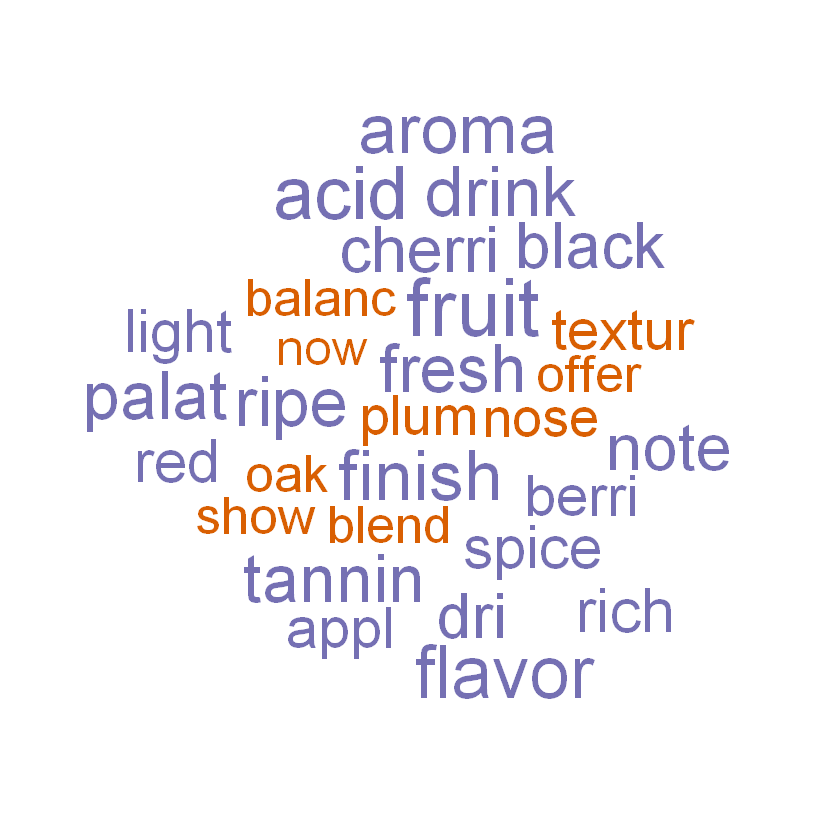

In [128]:
freq = data.frame(sort(colSums(as.matrix(desc_dtm)), decreasing=TRUE))
wordcloud(rownames(freq), freq[,1], max.words=100, colors=brewer.pal(1, "Dark2"))

## Compute Cosine similarity

In [129]:
require('slam')

In [130]:
sim_mat_cos <- crossprod_simple_triplet_matrix(t(desc_dtm))/(sqrt(col_sums(t(desc_dtm)^2) %*% t(col_sums(t(desc_dtm)^2))))

ERROR: Error: cannot allocate vector of size 30.6 Gb
